# CNN

In [1]:
import tensorflow as tf
from tensorflow import keras
import stella
import glob
import numpy as np
import sys
sys.path.insert(1,'/Users/azib/Documents/open_source/nets2/stella')
sys.path.insert(1,'/Users/azib/Documents/open_source/nets2/scripts')
from utils import *
import lightkurve as lk
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
%load_ext tensorboard
print(tf.config.list_physical_devices())

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


/Users/azib/micromamba/envs/nets2-metal/lib/python3.8/site-packages/lightkurve/config/__init__.py:119: UserWarning: The default Lightkurve cache directory, used by download(), etc., has been moved to /Users/azib/.lightkurve/cache. Please move all the files in the legacy directory /Users/azib/.lightkurve-cache to the new location and remove the legacy directory. Refer to https://docs.lightkurve.org/reference/config.html#default-cache-directory-migration for more information.
  warnings.warn(


In [2]:
cadences = 96
frac_balance = 0.6

In [3]:
exoplanets = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/exoplanets1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/exoplanets1k.txt',cadences=cadences,frac_balance=1)

Reading in training set files.


100%|███████████████████████████████████████████████████████████| 999/999 [00:00<00:00, 3360.37it/s]


Number of positive class training data: 799
Number of negative class training data: 0
Number of positive class validation data: 100
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 799
Class label (validation): 1, Count: 100
Total size of training set: 799
Total size of validation set: 100
Total size of test set: 100
No second class to calculate imbalance.


In [4]:
fbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries1k/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/fakebinaries1k.txt',frac_balance=1,cadences=cadences)

Reading in training set files.


100%|█████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 3465.16it/s]

Number of positive class training data: 800
Number of negative class training data: 0
Number of positive class validation data: 100
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 800
Class label (validation): 1, Count: 100
Total size of training set: 800
Total size of validation set: 100
Total size of test set: 100
No second class to calculate imbalance.


In [5]:
# exocomets_extra = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets10k-cometcurve2/',
#                          catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets10k-cometcurve2.txt',cadences=cadences,frac_balance=1)

In [6]:
rbinaries = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/binaries-s7/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/binaries-catalog-s7.txt',cadences=cadences,frac_balance=1)

Reading in training set files.


100%|███████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 1893.54it/s]

Number of positive class training data: 2272
Number of negative class training data: 0
Number of positive class validation data: 284
Number of negative class validation data: 0
Size of augmented data (training set only): 0
Class label (training): 1, Count: 2272
Class label (validation): 1, Count: 284
Total size of training set: 2272
Total size of validation set: 284
Total size of test set: 284
No second class to calculate imbalance.


In [7]:
# ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets10k-newmodel/',
#                          catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets10k-newmodel.txt',cadences=cadences,training=0.8,validation=0.1,frac_balance=0.26 , merge_datasets=True,other_datasets = [exoplanets,fbinaries,rbinaries,exocomets_extra],other_datasets_labels = [2,3,4,1] )

In [8]:
# ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets15k-cometcurve2/',
#                          catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets15k-cometcurve2.txt',cadences=cadences,training=0.8,validation=0.15,frac_balance=0.76,augment_portion=0.3,
#                         merge_datasets=True,other_datasets=[exocomets_extra,exoplanets,rbinaries,fbinaries],other_datasets_labels=[1,2,3,4])

In [9]:
ds = stella.FlareDataSet(fn_dir='/Users/azib/Documents/open_source/nets2/models/comets15k-normalised-depthscaled/',
                         catalog='/Users/azib/Documents/open_source/nets2/catalogs/comets15k-normalised-depthscaled.txt',cadences=cadences,frac_balance=0.9,augment_portion=0.2)

Reading in training set files.


100%|███████████████████████████████████████████████████████| 15284/15284 [00:04<00:00, 3634.51it/s]


Number of positive class training data: 12217
Number of negative class training data: 12170
Number of positive class validation data: 1527
Number of negative class validation data: 1216
Size of augmented data (training set only): 2443
Class label (training): 0.0, Count: 12170
Class label (training): 1.0, Count: 12217
Class label (validation): 0, Count: 1216
Class label (validation): 1, Count: 1527
Total size of training set: 24387
Total size of validation set: 2743
Total size of test set: 2743
Approximate class imbalance: -0.0



## Training Data Plots

12217 positive class in training set
12170 true negative class in training set


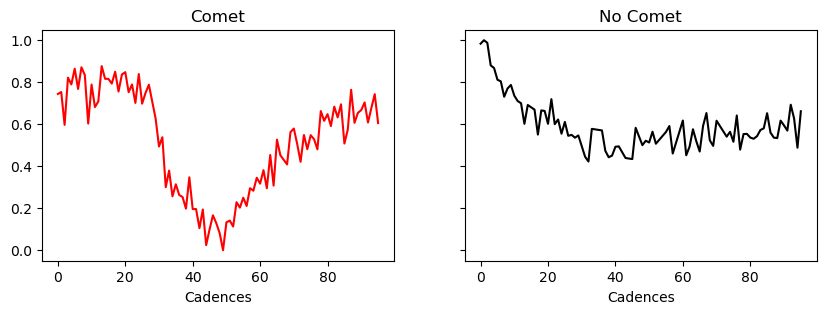

In [10]:
m = 95
ind_pc = np.where(ds.train_labels==1)[0] 
ind_nc = np.where(ds.train_labels!=1)[0] 
print(len(ind_pc),"positive class in training set")
print(len(ind_nc),"true negative class in training set")

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.train_data[ind_pc[m]], 'r')
ax1.set_title('Comet')
ax1.set_xlabel('Cadences')
ax2.plot(ds.train_data[ind_nc[m]], 'k')
ax2.set_title('No Comet')
ax2.set_xlabel('Cadences');

## Training Data Imbalance

In [11]:
print(f"{np.round(100 * len(ind_pc) / len(ind_nc))}% class imbalance")
print(len(ind_pc), "positive class")
print(len(ind_nc), "negative class")

100.0% class imbalance
12217 positive class
12170 negative class


## Validation data plots

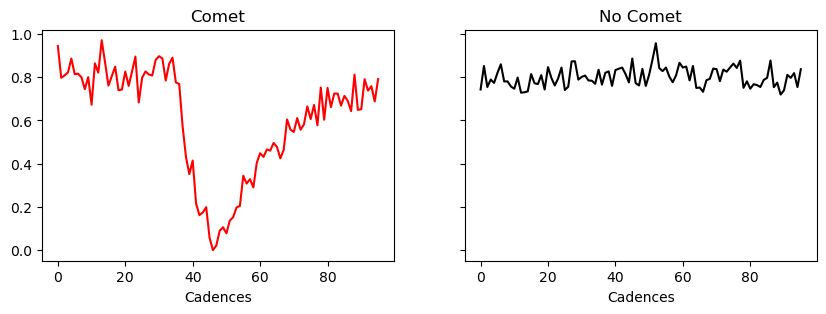

In [12]:
val_pc = np.where(ds.val_labels==1)[0] 
val_nc = np.where(ds.val_labels!=1)[0] 


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,3),
                               sharex=True, sharey=True)
ax1.plot(ds.val_data[val_pc[1]], 'r')
ax1.set_title('Comet')
ax1.set_xlabel('Cadences')
ax2.plot(ds.val_data[val_nc[-1]], 'k')
ax2.set_title('No Comet')
ax2.set_xlabel('Cadences');

In [13]:
print(f"{np.round(100 * len(val_pc) / len(val_nc))}% class imbalance")
print(len(val_pc), "positive class")
print(len(val_nc), "negative class")

126.0% class imbalance
1527 positive class
1216 negative class


In [14]:
# dsmodels = ds.train_data[ind_nc]

# num_sets = dsmodels.shape[0] // 100

# for set_index in range(num_sets):
#     start_index = set_index * 100
#     end_index = min((set_index + 1) * 100, dsmodels.shape[0])  # Ensure not to exceed the length of the data

#     # Create a new 10x10 grid of subplots for each set
#     fig, axs = plt.subplots(10, 10, figsize=(20, 20))

#     # Flatten the axes array for easier iteration
#     axs = axs.flatten()

#     # Iterate over the elements in the current set and plot each in the grid
#     for i in range(start_index, end_index):
#         plot_index = i % 100  # Calculate the index within the current grid
#         axs[plot_index].plot(dsmodels[i, :, 0])  # Assuming you want to plot the first dimension of your array
#         axs[plot_index].set_title(f"Plot {i}")  # Title for each subplot

#     # Hide any remaining empty subplots
#     for j in range(end_index - start_index, len(axs)):
#         axs[j].axis('off')

    
#     plt.tight_layout()  # Adjust layout
#     #plt.savefig(f'example-models{start_index}-{end_index}.png',dpi=200,bbox_inches='tight')
#     plt.show()  # Show the grid of plots
#     break

### Following exomoon paper

In [15]:
# layers = [
#     tf.keras.layers.Conv1D(
#         filters=3,
#         kernel_size=4,
#         activation='relu',
#         padding="same",
#         input_shape=(cadences,1)
#     ),
#     tf.keras.layers.Conv1D(
#         filters=3,
#         kernel_size=4,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.AveragePooling1D(pool_size=5, strides=2),
    
#     tf.keras.layers.Conv1D(
#         filters=8,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.Conv1D(
#         filters=8,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.AveragePooling1D(pool_size=5, strides=2),
    
#     tf.keras.layers.Conv1D(
#         filters=16,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.Conv1D(
#         filters=16,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.AveragePooling1D(pool_size=5, strides=2),
    
#     tf.keras.layers.Conv1D(
#         filters=32,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.Conv1D(
#         filters=32,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.AveragePooling1D(pool_size=5, strides=2),
    
#     tf.keras.layers.Conv1D(
#         filters=64,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.Conv1D(
#         filters=64,
#         kernel_size=3,
#         activation='relu',
#         padding="same"
#     ),
#     tf.keras.layers.AveragePooling1D(pool_size=5, strides=2),
    
#     tf.keras.layers.Dropout(0.25),
    
#     tf.keras.layers.Dense(
#         128,
#         activation='relu'
#     ),
#     tf.keras.layers.Dense(
#         128,
#         activation='relu'
#     ),
#     tf.keras.layers.Dense(
#         128,
#         activation='relu'
#     ),
#     tf.keras.layers.Dense(
#         128,
#         activation='relu'
#     ),
    
#     tf.keras.layers.Dense(1, activation="sigmoid")]

### If we followed `stella`

In [29]:
filter1 = 16
filter2 = 64
kernel_size1 = 9
kernel_size2 = 3
pool_size = 2
dropout = 0.3
dense = 64
l2val = 0.001
input_shape = (cadences, 1)
activation = 'leaky_relu'

# Define the model layers as a list
layers = [
    tf.keras.layers.Conv1D(
        filters=filter1,
        kernel_size=kernel_size1,
        activation=activation,
        padding="same",
        input_shape=input_shape,
        kernel_regularizer=tf.keras.regularizers.l2(l2val)  # Optional: include if needed
    ),
    tf.keras.layers.MaxPooling1D(pool_size=pool_size),
    tf.keras.layers.Dropout(dropout),
    
    tf.keras.layers.Conv1D(
        filters=filter2,
        kernel_size=kernel_size2,
        activation=activation,
        padding="same",
        kernel_regularizer=tf.keras.regularizers.l2(l2val)  # Optional: include if needed
    ),
    tf.keras.layers.MaxPooling1D(pool_size=pool_size),
    tf.keras.layers.Dropout(dropout),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        dense,
        activation=activation,
        kernel_regularizer=tf.keras.regularizers.l2(l2val)  # Optional: include if needed
    ),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation="sigmoid")
]

In [30]:
cnn = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds ,layers=layers)
SEED = [3]
epochs = 150
bs = 128

In [ ]:
#%tensorboard --logdir './logs'
cnn.train_models(seeds=SEED, epochs=epochs,batch_size=bs,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 96, 16)            160       
                                                                 
 max_pooling1d (MaxPooling1  (None, 48, 16)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 48, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 48, 64)            3136      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 24, 64)            0         
 g1D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 24, 64)            0

2024-08-19 15:46:26.149579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.9332 - precision: 0.9260 - recall: 0.9418

2024-08-19 15:46:32.955534: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


191/191 [==============================] - 9s 41ms/step - loss: 0.2746 - accuracy: 0.9332 - precision: 0.9260 - recall: 0.9418 - val_loss: 0.1592 - val_accuracy: 0.9748 - val_precision: 0.9880 - val_recall: 0.9666 - lr: 0.0010
Epoch 2/150
191/191 [==============================] - 10s 50ms/step - loss: 0.1715 - accuracy: 0.9670 - precision: 0.9696 - recall: 0.9644 - val_loss: 0.1284 - val_accuracy: 0.9781 - val_precision: 0.9946 - val_recall: 0.9659 - lr: 0.0010
Epoch 3/150
191/191 [==============================] - 7s 36ms/step - loss: 0.1413 - accuracy: 0.9724 - precision: 0.9770 - recall: 0.9676 - val_loss: 0.1558 - val_accuracy: 0.9650 - val_precision: 0.9972 - val_recall: 0.9398 - lr: 0.0010
Epoch 4/150
191/191 [==============================] - 6s 31ms/step - loss: 0.1233 - accuracy: 0.9770 - precision: 0.9809 - recall: 0.9730 - val_loss: 0.0920 - val_accuracy: 0.9902 - val_precision: 0.9921 - val_recall: 0.9902 - lr: 0.0010
Epoch 5/150
191/191 [==============================] - 

In [ ]:
from matplotlib import cm
import matplotlib.colors as mcolors
import numpy as np

if type(SEED) == list:
    for seeds in SEED:
        # Create a custom colormap
        custom_cmap = mcolors.ListedColormap(['yellow', 'darkblue', 'red','cyan'])

        fig, axes = plt.subplots(2, 2, figsize=(13,8))
        formatted_seed = f'{seeds:04}'

        # Plot ground truth
        sc = axes[0, 0].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                                c=cnn.val_pred_table['labels'], cmap=custom_cmap, label=f'Seed {formatted_seed}',s=5,alpha=0.8)
        axes[0, 0].set_xlabel('Tpeak [BJD - 2457000]')
        axes[0, 0].set_ylabel('Probability of Exocomet')
        axes[0,0].set_title('Probabilities (with the original labels)')
        plt.colorbar(sc, ax=axes[0, 0], ticks=np.arange(4), boundaries=np.arange(4+1)-0.5)

        # Plot loss
        axes[1, 1].plot(cnn.history_table[f'loss_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[1, 1].plot(cnn.history_table[f'val_loss_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[1, 1].set_xlabel('Epochs')
        axes[1, 1].set_ylabel('Loss')
        axes[1,1].set_title('Loss')
        axes[1, 1].legend()

        # Plot accuracy
        axes[1, 0].plot(cnn.history_table[f'accuracy_s{formatted_seed}'], label=f'Training Seed {formatted_seed}', lw=3)
        axes[1, 0].plot(cnn.history_table[f'val_accuracy_s{formatted_seed}'], label=f'Validation Seed {formatted_seed}', lw=3)
        axes[1, 0].set_xlabel('Epochs')
        axes[1, 0].set_ylabel('Accuracy')
        axes[1, 0].set_title('Accuracy')
        axes[1, 0].legend()

        # Plot ground truth (gt)
        sc2 = axes[0, 1].scatter(cnn.val_pred_table['tpeak'], cnn.val_pred_table[f'pred_s{formatted_seed}'],
                                 c=cnn.val_pred_table['gt'], label=f'Seed {formatted_seed}',s=5)
        axes[0, 1].set_xlabel('Tpeak [BJD - 2457000]')
        axes[0, 1].set_ylabel('Probability of Exocomet')
        axes[0,1].set_title('Probabilities')
        plt.colorbar(sc2, ax=axes[0, 1])#, ticks=np.arange(2)#, boundaries=np.arange(2)-0.5)
    
        plt.tight_layout()
        plt.savefig(f'../plots/metrics-{SEED}.png',dpi=300,bbox_inches='tight')
        plt.show()

Colour plot with SNR value

---

## Predicting

In [56]:
files2 = glob.glob('../models/comets-val/*')
np.random.shuffle(files2)

In [57]:
modelname = f'../cnn-models/ensemble_s0003_i0150_b0.79.h5'

In [58]:
lc = lk.search_lightcurve('Beta Pic',mission='TESS',sector=6,author='TESS-SPOC')[0].download()
lc = lc[lc.quality.value == 0]

In [59]:
f = np.array((lc.flux.value/np.nanmedian(lc.flux.value)) - 1)

In [60]:
f = np.array(f / np.nanstd((lc.flux.value/np.nanmedian(lc.flux.value))-1))
f = f + 1
f = f[~np.isnan(f)]
f = (f - np.min(f)) / (np.max(f) - np.min(f))

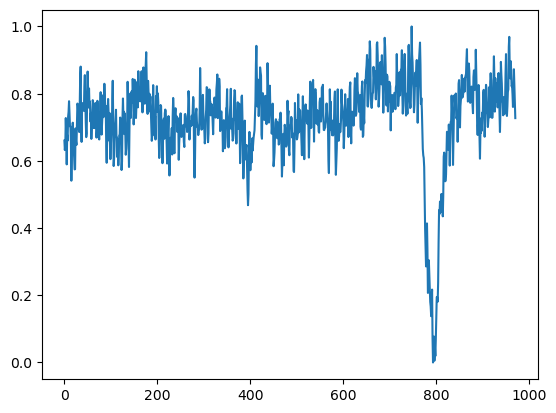

In [61]:
plt.plot(f)

100%|██████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.07s/it]


Text(0, 0.5, 'Normalised Flux')

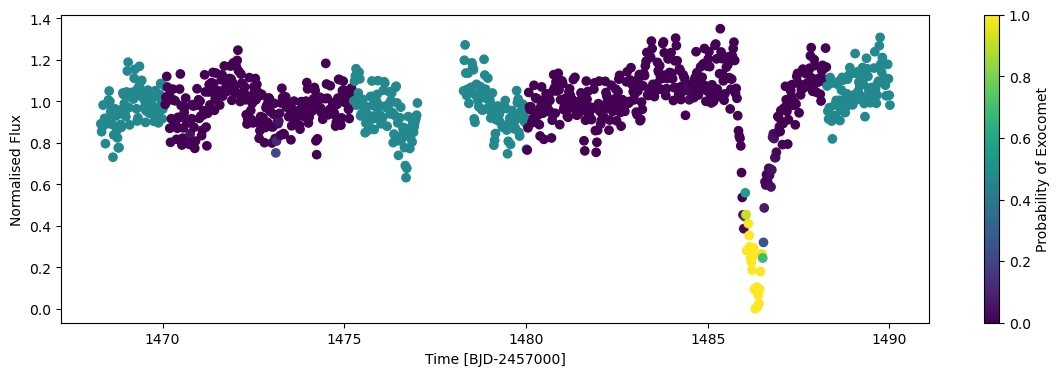

In [62]:

cnn.predict(modelname=modelname,
            times=lc.time.value[0:-1],
            fluxes=f,
            errs=lc.flux_err.value[0:-1])

plt.figure(figsize=(14,4))
plt.scatter(cnn.predict_time[0], cnn.predict_flux[0],
            c=cnn.predictions[0], vmin=0, vmax=1)
plt.colorbar(label='Probability of Exocomet')
#plt.axvline(cnn.predict_time[0][np.argmax(cnn.predictions)],color='red',linestyle='--',zorder=1)
plt.xlabel('Time [BJD-2457000]')
plt.ylabel('Normalised Flux')


100%|████████████████████| 1/1 [00:00<00:00,  3.69it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.07it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.70it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.89it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.95it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.91it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.94it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.85it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.54it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.92it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.65it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.66it/s]


0.43689537


100%|████████████████████| 1/1 [00:00<00:00,  4.71it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.56it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.79it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.89it/s]


0.43689528


100%|████████████████████| 1/1 [00:00<00:00,  4.83it/s]


0.43689537


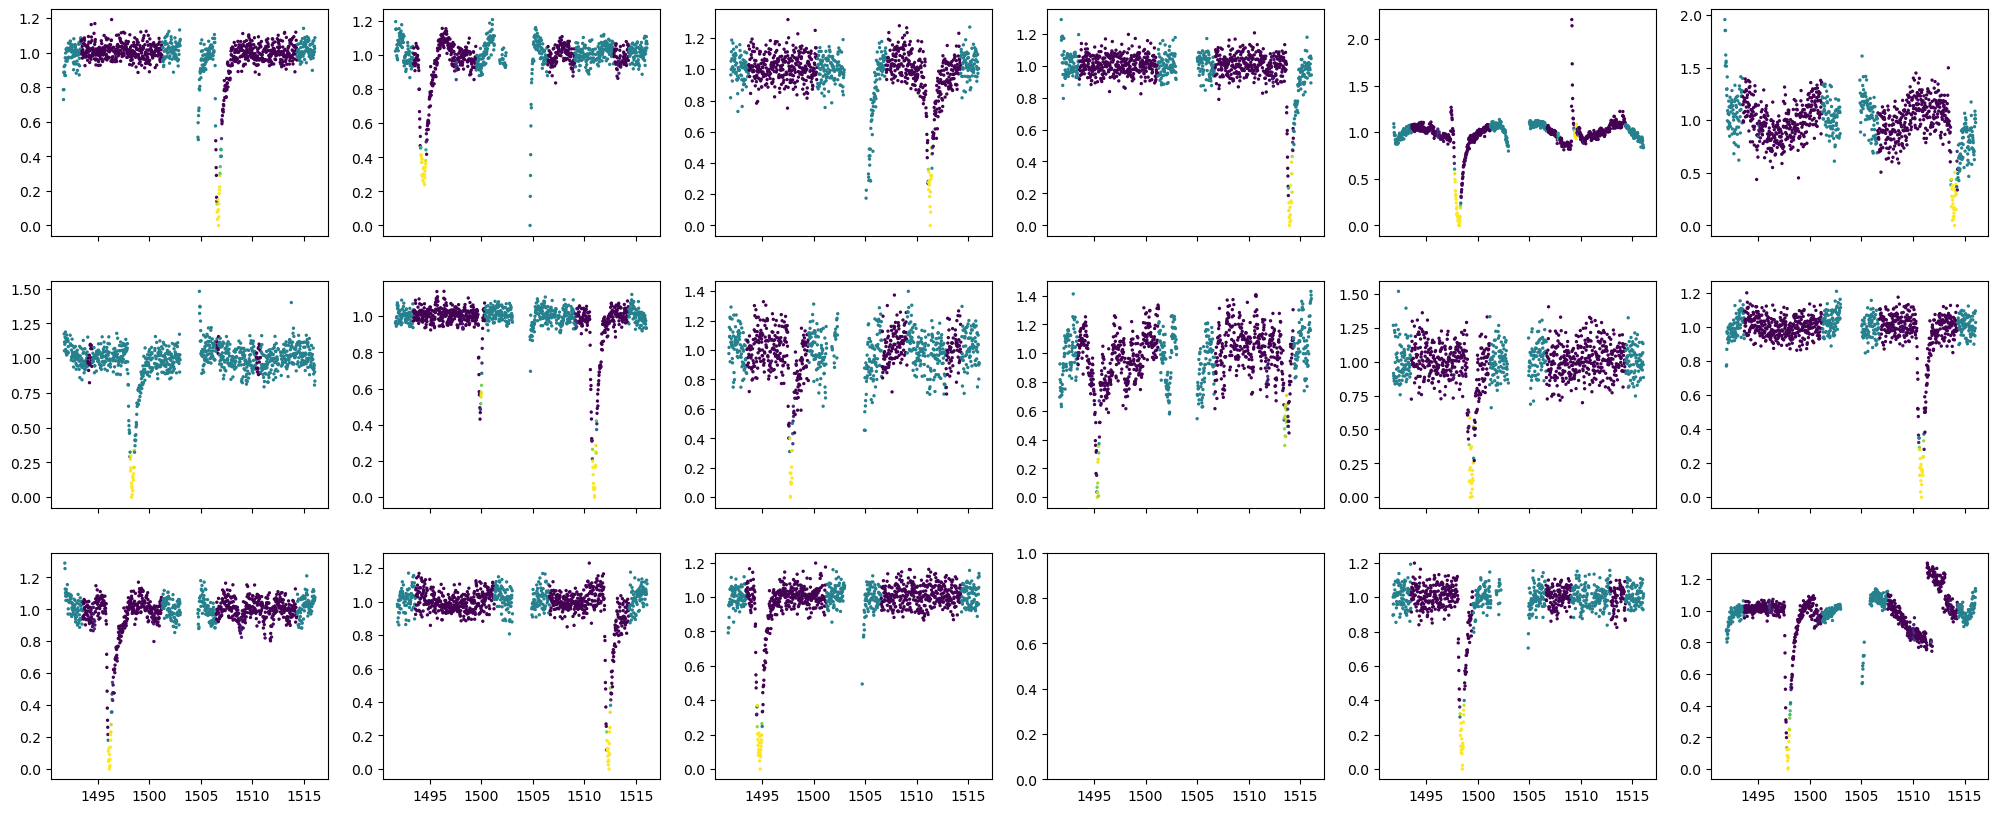

In [24]:
fig, ax = plt.subplots(3, 6, figsize=(25, 10),sharex=True)

max_pred = []
for i, a in enumerate(ax.flatten()):
    try:
        file = np.load(files2[i],allow_pickle=True)
        f = file[1]
        f = np.array(f / np.nanstd((f/np.nanmedian(f))-1))
        f = f + 1
        f = f[~np.isnan(f)]
        f = (f - np.min(f)) / (np.max(f) - np.min(f))
        
        cnn.predict(modelname=modelname,
                    times=file[0],
                    fluxes=f,
                    errs=file[2])
        max_pred.append(np.max(cnn.predictions[0]))
        a.scatter(cnn.predict_time[0], cnn.predict_flux[0],
                  c=cnn.predictions[0], s=2, vmin=0, vmax=1)
        print(cnn.predictions[0][-1])
    except:
        continue
        

plt.show()



### Predictions for all

In [25]:
max_pred = []
for i in files2:
    try:
        f = np.load(i,allow_pickle=True)
        cnn.predict(modelname=modelname,
                    times=f[0],
                    fluxes=f[1],
                    errs=f[2])
        max_pred.append(np.max(cnn.predictions[0]))
    except:
        continue



100%|████████████████████| 1/1 [00:00<00:00,  2.68it/s]


100%|████████████████████| 1/1 [00:00<00:00,  2.86it/s]


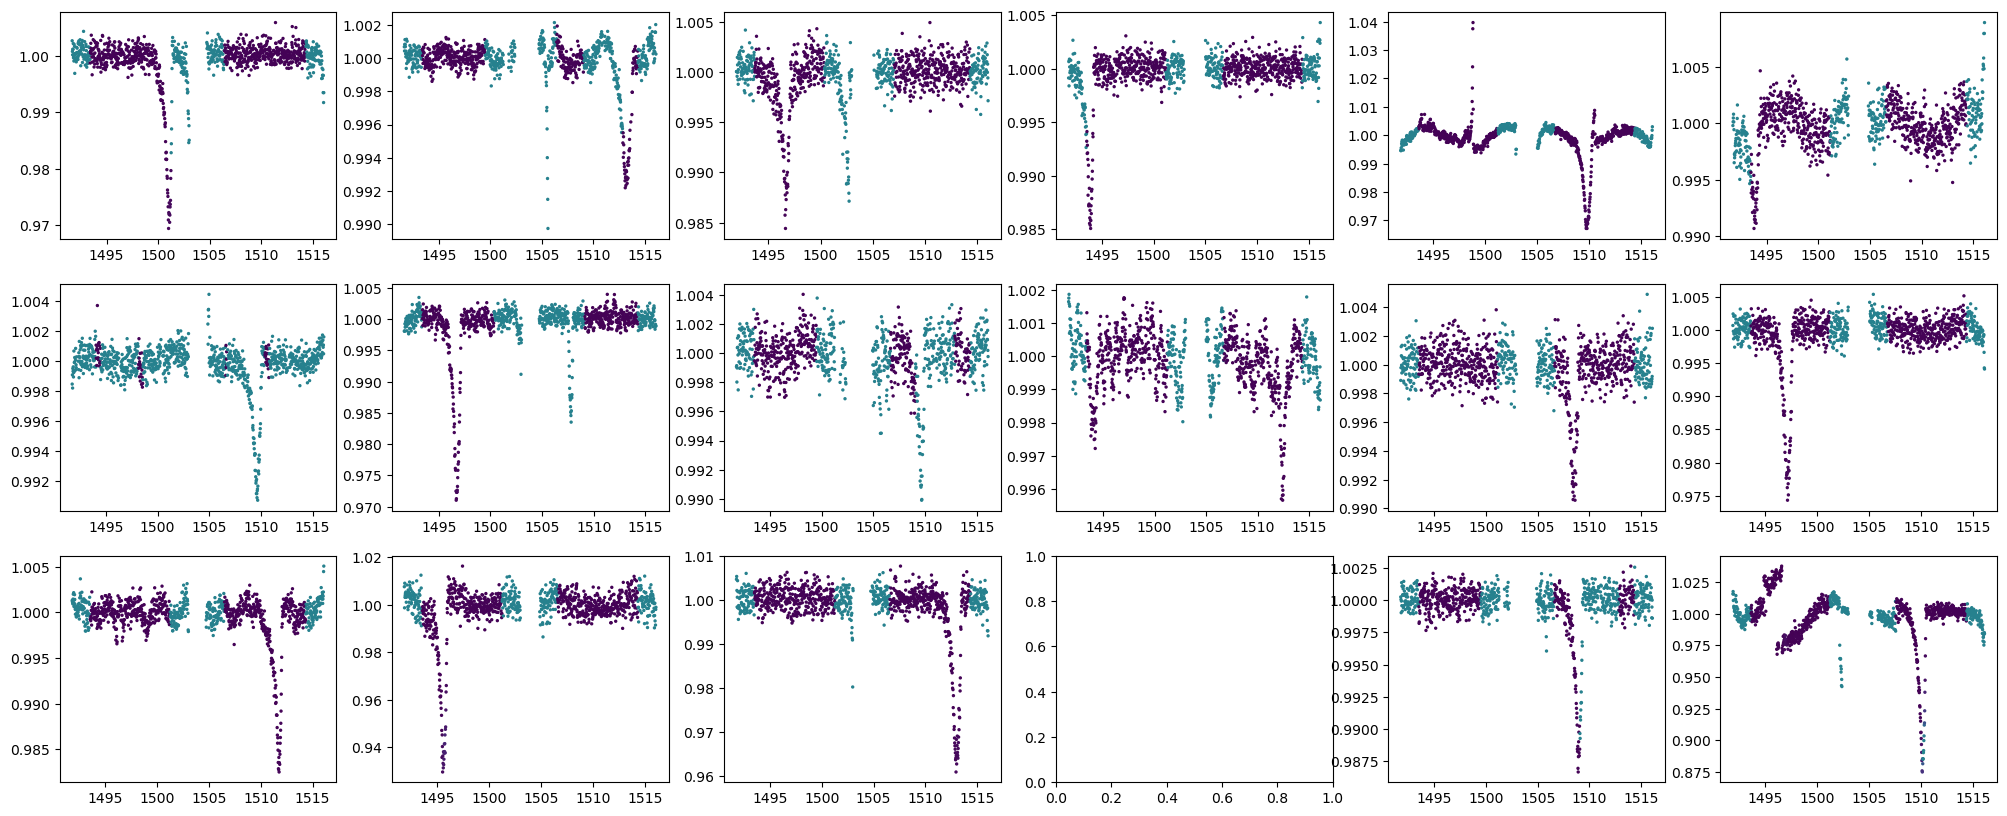

In [26]:
fig, ax = plt.subplots(3, 6, figsize=(25, 10))

for i, a in enumerate(ax.flatten()):
    try:
        f = np.load(files2[i],allow_pickle=True)
        cnn.predict(modelname=modelname,
                    times=f[0],
                    fluxes=f[1][::-1],
                    errs=f[2])
        a.scatter(cnn.predict_time[0], cnn.predict_flux[0],
                  c=cnn.predictions[0], s=2, vmin=0, vmax=1)
    except:
        pass
    
plt.show()



### Predictions for negative

In [112]:
max_pred_neg = []
for i in files2:
    try:
        f = np.load(i,allow_pickle=True)
        cnn.predict(modelname=modelname,
                    times=f[0],
                    fluxes=f[1][::-1],
                    errs=f[2])
        max_pred_neg.append(np.max(cnn.predictions[0]))
    except:
        continue



  0%|                                                                                                 | 0/1 [00:00<?, ?it/s]


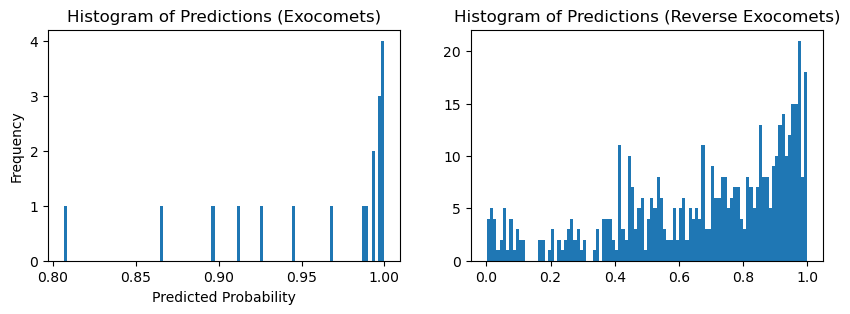

In [114]:
fig2, ax2 = plt.subplots(1,2,figsize=(10, 3))
ax2[0].hist(max_pred, bins=100)
ax2[0].set_title('Histogram of Predictions (Exocomets)')
ax2[0].set_xlabel('Predicted Probability')
ax2[0].set_ylabel('Frequency')

ax2[1].hist(max_pred_neg,bins=100)
ax2[1].set_title('Histogram of Predictions (Reverse Exocomets)')


plt.show()

---

## CNN from scratch

In [98]:
filter1 = 4
filter2 = 8
filter3 = 16
filter4 = 32
filter5 = 64
kernel_size = 3
pool_size = 2
dropout = 0.25
dense = 128
l2val = 0.0001
input_shape = (168, 1)  # Adjust the input shape as needed
activation = 'relu'

# Define the model layers as a list
layers2 = [
    tf.keras.layers.Conv1D(
        filters=filter1,
        kernel_size=kernel_size,
        activation=activation,
        padding="same",
        input_shape=input_shape,
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.AveragePooling1D(pool_size=pool_size),
    
    tf.keras.layers.Conv1D(
        filters=filter2,
        kernel_size=kernel_size,
        activation=activation,
        padding="same",
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.AveragePooling1D(pool_size=pool_size),
    
    tf.keras.layers.Conv1D(
        filters=filter3,
        kernel_size=kernel_size,
        activation=activation,
        padding="same",
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.AveragePooling1D(pool_size=pool_size),
    
    tf.keras.layers.Conv1D(
        filters=filter4,
        kernel_size=kernel_size,
        activation=activation,
        padding="same",
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.AveragePooling1D(pool_size=pool_size),
    
    tf.keras.layers.Conv1D(
        filters=filter5,
        kernel_size=kernel_size,
        activation=activation,
        padding="same",
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.AveragePooling1D(pool_size=pool_size),
    
    tf.keras.layers.Dropout(dropout),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        dense,
        activation=activation,
        #kernel_regularizer=tf.keras.regularizers.l2(l2val)
    ),
    tf.keras.layers.Dropout(dropout),
    tf.keras.layers.Dense(1, activation="sigmoid")
]

In [99]:
cnn2 = stella.ConvNN(output_dir='/Users/azib/Documents/open_source/nets2/cnn-models/',ds=ds,layers=layers2)
SEED = [96]
epochs = 150
bs = 128

In [100]:
cnn2.train_models(seeds=SEED, epochs=epochs,batch_size=bs,shuffle=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 168, 4)            16        
                                                                 
 average_pooling1d (Average  (None, 84, 4)             0         
 Pooling1D)                                                      
                                                                 
 conv1d_1 (Conv1D)           (None, 84, 8)             104       
                                                                 
 average_pooling1d_1 (Avera  (None, 42, 8)             0         
 gePooling1D)                                                    
                                                                 
 conv1d_2 (Conv1D)           (None, 42, 16)            400       
                                                                 
 average_pooling1d_2 (Avera  (None, 21, 16)            0

2024-08-12 17:41:18.800696: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - ETA: 0s - loss: 0.6890 - accuracy: 0.5495 - precision: 0.4471 - recall: 0.0279

2024-08-12 17:41:24.150579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


201/201 [==============================] - 7s 21ms/step - loss: 0.6890 - accuracy: 0.5495 - precision: 0.4471 - recall: 0.0279 - val_loss: 0.7050 - val_accuracy: 0.4548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 2/150
201/201 [==============================] - 3s 13ms/step - loss: 0.6879 - accuracy: 0.5525 - precision: 0.5000 - recall: 8.6949e-05 - val_loss: 0.7022 - val_accuracy: 0.4548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 3/150
201/201 [==============================] - 3s 15ms/step - loss: 0.6875 - accuracy: 0.5525 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 0.7060 - val_accuracy: 0.4548 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010
Epoch 4/150
201/201 [==============================] - 4s 22ms/step - loss: 0.6873 - accuracy: 0.5523 - precision: 0.4545 - recall: 0.0013 - val_loss: 0.7012 - val_accuracy: 0.4555 - val_precision: 1.0000 - val_recall: 0.0014 - lr: 0.0010
Epoch 5/150
201/201 

/Users/azib/micromamba/envs/nets2-metal/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
2024-08-12 17:43:53.589421: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


124/124 [==============================] - 0s 2ms/step


/Users/azib/micromamba/envs/nets2-metal/lib/python3.8/site-packages/stella-0.2.0rc2-py3.8.egg/stella/neural_network.py:804: RuntimeWarning: invalid value encountered in long_scalars
  results_text += f"  {class_name}: {correct}/{total} ({correct/total:.2%})\n"
